# Calculate magnitudes of the stars

Written by Evgenii N.

This code calculates the magnitudes of stars.

## Prerequisite code

In [1]:
# Import libraries that we will use later in this notebook
import os
import matplotlib.pyplot as plt
import pandas as pd

# Make images non-blurry on high pixel density screens
%config InlineBackend.figure_format = 'retina'


def set_plot_style():
    """Set global style"""

    # Title size
    plt.rcParams['axes.titlesize'] = 17

    # Axes label size
    plt.rcParams['axes.labelsize'] = 15

    # Tick label size
    plt.rcParams['xtick.labelsize'] = 13
    plt.rcParams['ytick.labelsize'] = 13
    
    # Legend text size
    plt.rcParams['legend.fontsize'] = 13

    # Grid color
    plt.rcParams['grid.color'] = '#cccccc'

    # Define plot size
    plt.rcParams['figure.figsize'] = [12, 8]

    # Marker size
    plt.rcParams['lines.markersize'] = 10
    
    
set_plot_style()

## Plot color-magnitude diagram

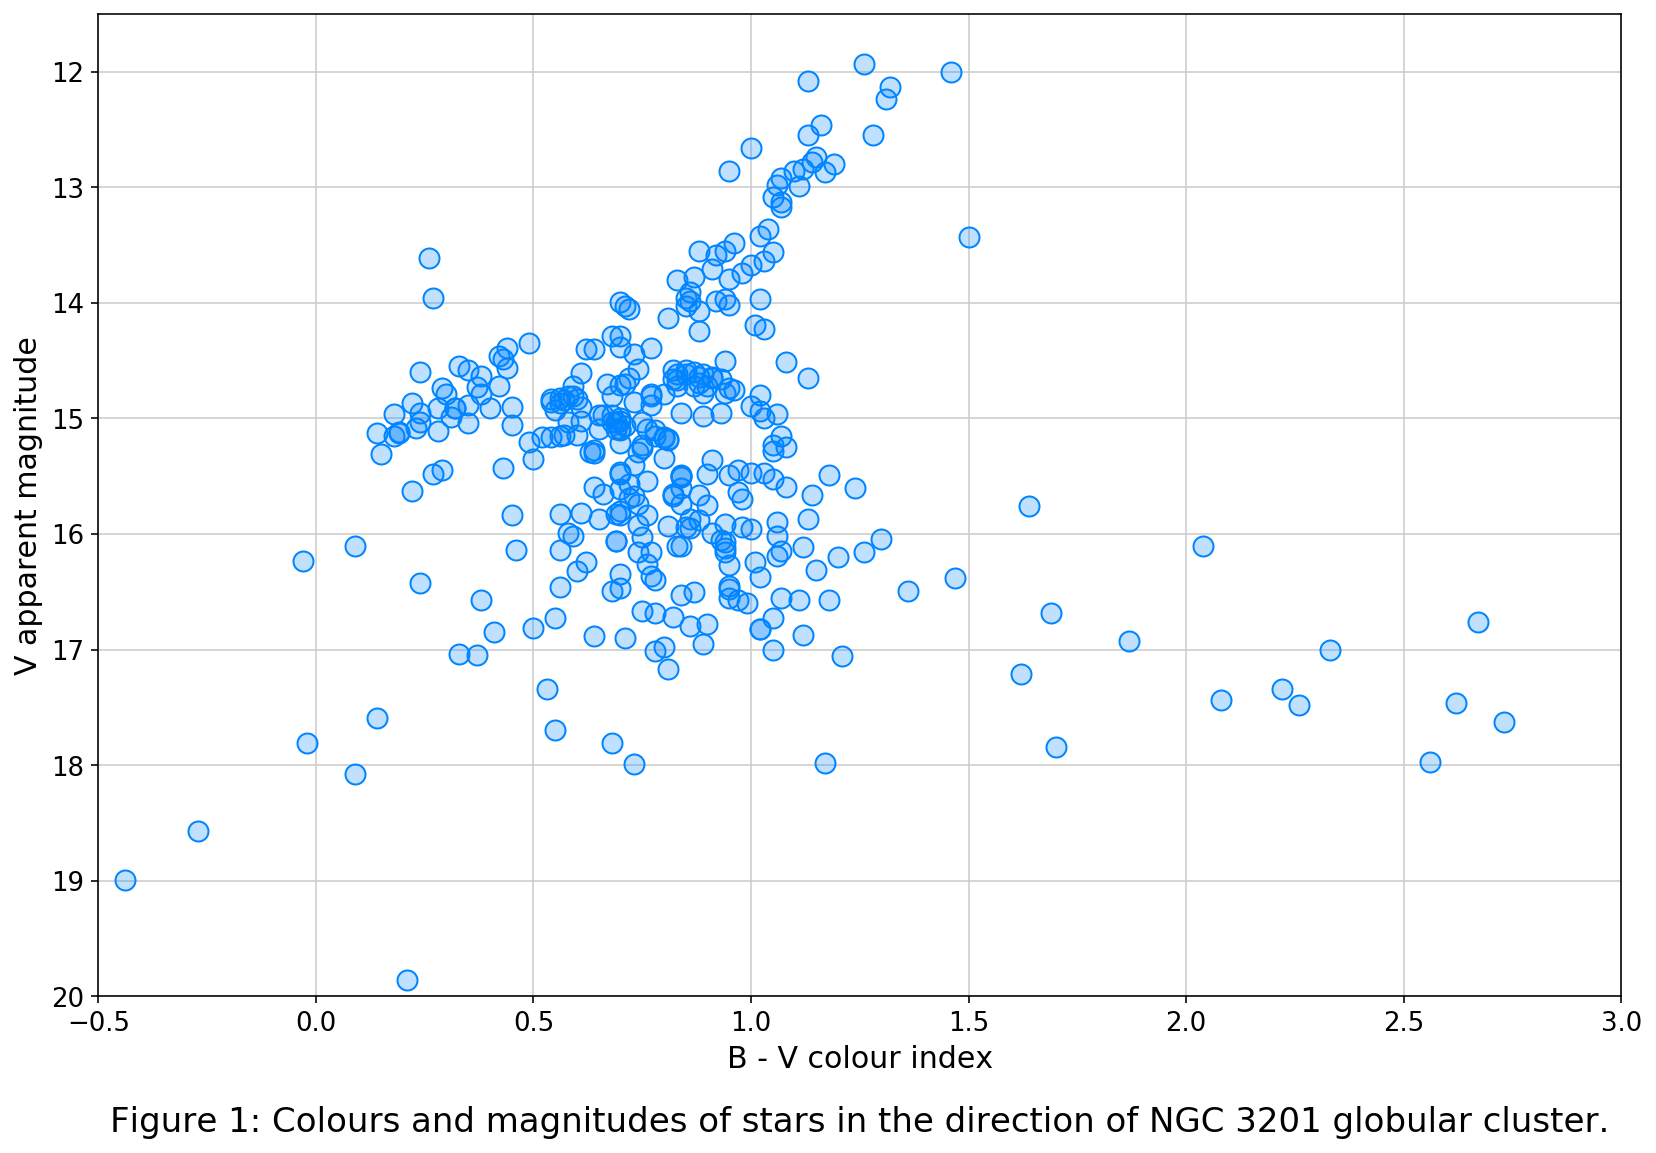

In [20]:
def save_plot(fig, plot_dir, file_name):
    """
    Save a plot to a file.
    
    Parameters
    ----------
    
    fig: matplotlib.figure.Figure
        Plot's figure
        
    plot_dir: str
        Directory where the plot file is placed.
        
    file_name: str
        Plot file name
    
    """
    
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    
    image_path = os.path.join(plot_dir, file_name)

    plt.savefig(image_path, fig=fig, dpi=150)



def make_cmd(data_path, blue_mag, red_mag,
             x_label, y_label, title, xlims, ylims,
             y_offset=0, x_offset=0, title_offset=-0.15):   
    """
    Make a plot of colour magnitude diagram.
    
    Parameters
    ----------
        
    data_path: str
        Path to the CSV file containing magnitudes for stars.
        
    blue_mag, red_mag: str
        Names of the column containing magnitudes for the bluer and redder filters.
        
    x_label, y_label: str
        Axes labels.
        
    title: str
        Plot's title.
        
    xlims, ylims: (low, high)
        Limits for the axes.
        
    y_offset: float
        Offset that is added to the Y values of the observed data.
    """

    # Read magnitudes and colors from CSV file
    df = pd.read_csv(data_path)

    # Create a figure and axis object
    fig, ax = plt.subplots(1, 1)
    
    # Drop rows with missing values
    df = df.dropna(subset=[blue_mag, red_mag])

    x_values = df[blue_mag] - df[red_mag]

    # Show plot
    ax.scatter(x_values + x_offset, df[red_mag] + y_offset, zorder=2,
               color="#0084ff40",
               edgecolor="#0084ff")

    # Show grid
    ax.grid(zorder=-1)

    # Set plot labels
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # Set axes limits
    # ------
    
    if xlims is not None:
        ax.set_xlim(xlims)
        
    if ylims is not None:
        ax.set_ylim(ylims)
    
    ax.set_title(title, y=title_offset)  # Set image title

    # Invert y axis
    ax.invert_yaxis()
    
    return fig, ax 

    
  
magnitudes_dir = "../060_find_magnitudes/data"
magnitudes_path = os.path.join(magnitudes_dir, "magnitudes.csv")

all_plot_settings = [
    dict(magnitudes=["B", "V"], xlims=(-0.5, 3), ylims=(11.5, 20)),
]

figure_number = 0

for plot_settings in all_plot_settings:
    axes_magnitudes = plot_settings['magnitudes']

    if 'xlims' in plot_settings:
        xlims = plot_settings['xlims']
    else:
        xlims = None
        
    if 'ylims' in plot_settings:
        ylims = plot_settings['ylims']
    else:
        ylims = None
            
    blue_mag = axes_magnitudes[0]
    blue_mag_lowcase = blue_mag.lower()
    red_mag = axes_magnitudes[1]
    red_mag_lowcase = red_mag.lower()
    figure_number += 1
    
    title = (
        f"Figure {figure_number}: Colours and magnitudes "
        "of stars in the direction of NGC 3201 globular cluster."
    )
    
    fig, ax = make_cmd(data_path=magnitudes_path,
                       blue_mag=f"{blue_mag_lowcase}_mag",
                       red_mag=f"{red_mag_lowcase}_mag",
                       x_label=f"{blue_mag} - {red_mag} colour index",
                       y_label=f"{red_mag} apparent magnitude",
                       xlims=xlims, ylims=ylims,
                       title=title)
    
    # Expand the plot to the edges
    fig.tight_layout()

    save_plot(fig=fig,
              file_name=f"cmd_{blue_mag_lowcase}_{red_mag_lowcase}.png",
              plot_dir="images")

## Does CMD look right?

Hmm, I don't see a main sequence on Fig. 1. In order to understand which stars am I looking at, I compare our plot with [Layden et al. (2003)]((https://ui.adsabs.harvard.edu/abs/2003AJ....125..208L/abstract)) on Fig. 2.

* It looks like we don't have any meain sequence stars on our plot (right panel), so we can't use main sequence matching to find the distance to our globular cluster.


I posted Fig. 2 on the forum, here is response from Michael Brown:

> you cannot use main sequence fitting for the GC distance (and age), but you can use the red giant branch and isochrones in the same way. Indeed, you could have fun over plotting 100 Myr, 1 Gyr and 10 Gyr isochrones on your plot using the same distance modulus.

> There are tables of red giant colours and magnitudes available too, so you can do a cross check without relying on the isochrones alone.

Great! Let's try fitting Girardi isochrones and find distance and age.

![Comparison with Layden et al. 2003](images/ngc_3201_locating_main_sequence.png)

Figure 2: Comparison of color magnitude diagram: left is Fig. 2 from [Layden et al. (2003)](https://ui.adsabs.harvard.edu/abs/2003AJ....125..208L/abstract), and the right is from our magnitude measurements. I drawn the evolutionary tracks by eye based on Layden. It appear that we don't have any main sequence stars in our data. However, I can see horizontal branch and giant stars, which is great.

## Plot Girardi isochrone

I generate a Girardi isochrone:

* Go to http://stev.oapd.inaf.it/cgi-bin/cmd
* Set linear age (yr) to 12e9, based on [Monty et al. 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...865..160M/abstract) estimate of 12.2 ± 0.5
* Set metallicity [M/H] to -1.5, based on [Marino et al. (2019)](https://arxiv.org/abs/1910.02892) estimate of −1.50 ± 0.02 (rms=0.07 dex).

Next, I plot the isochrone:

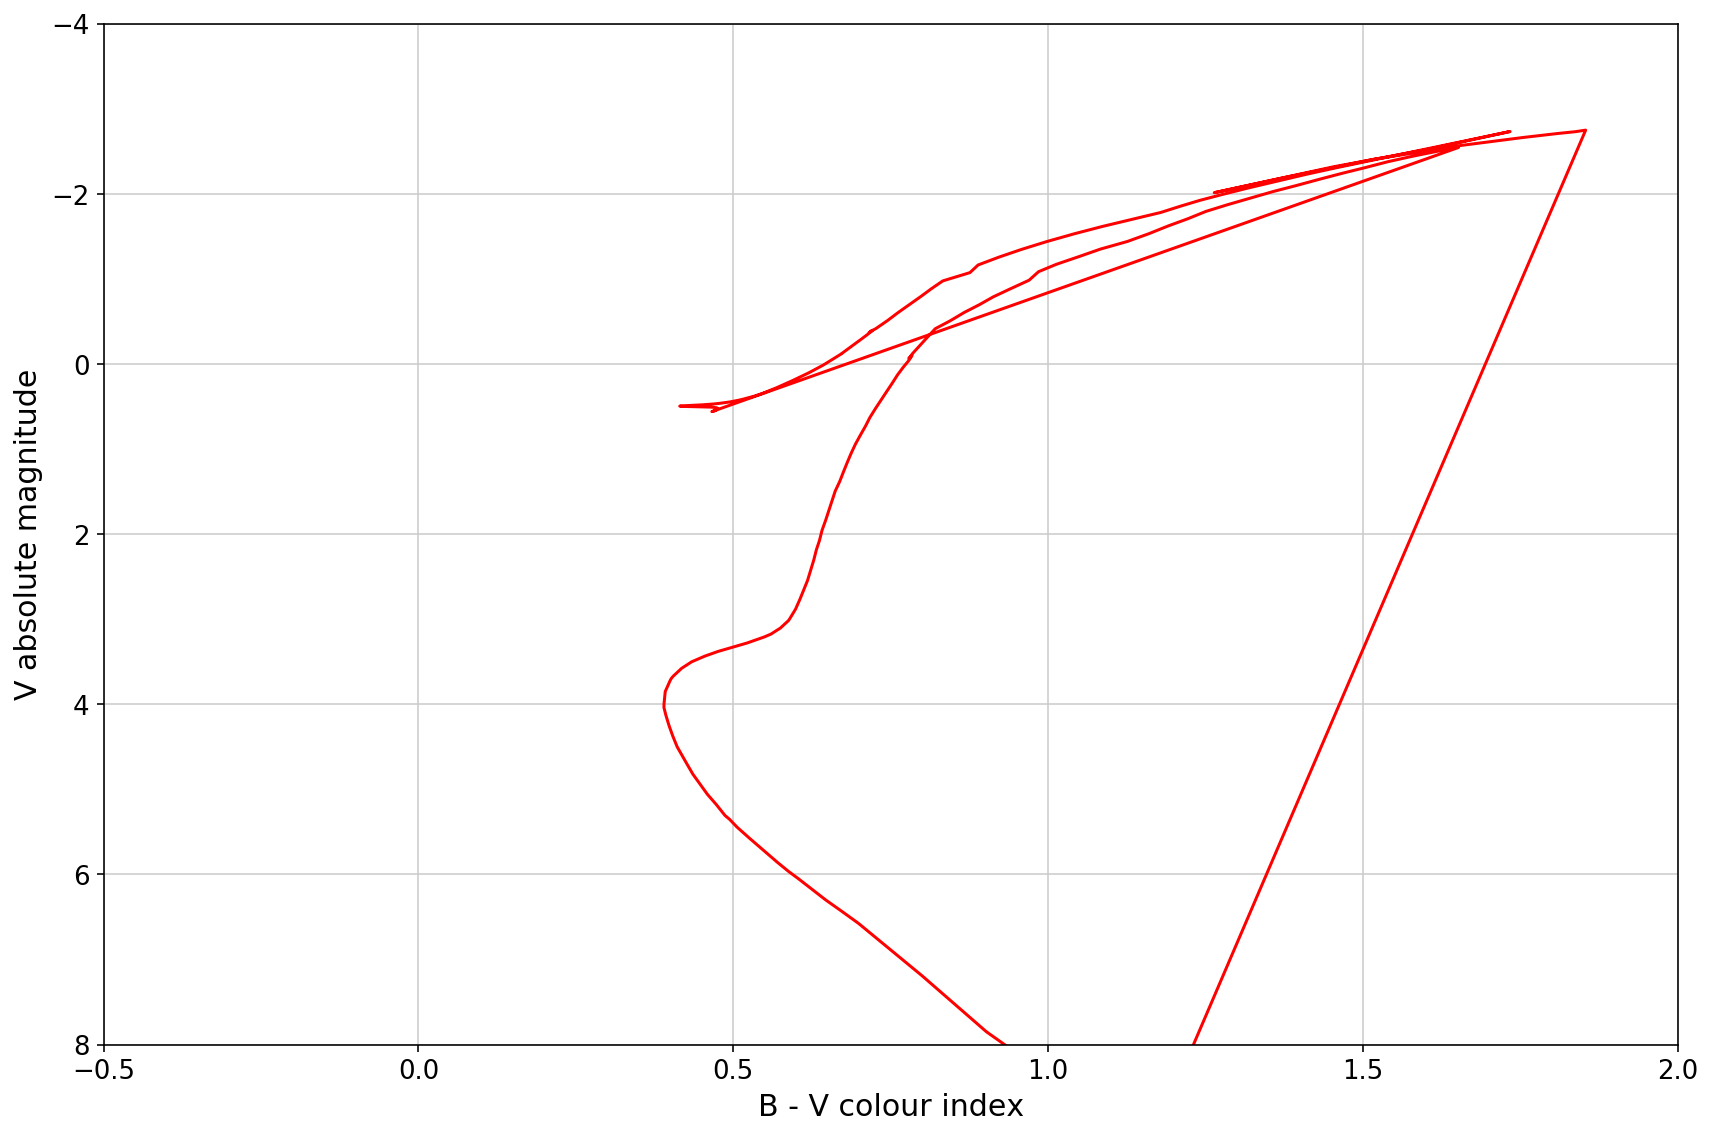

In [3]:
def plot_isochrone(plot_dir, file_name, data_path):  
    """
    Make a plot of a Girardi isochrone.
    
    Parameters
    ----------
    plot_dir: str
        Directory where the plot file is placed.
        
    file_name: str
        Plot file name.
        
    data_path: str
        Path to the text file output from http://stev.oapd.inaf.it/cgi-bin/cmd

    """

    # Read the data from text table,
    # using any whitespace characters as column separators
    df = pd.read_table(data_path, delimiter='\s+')

    # Create a figure and axis object
    fig, ax = plt.subplots(1, 1)

    # Show plot
    ax.plot(df["Bmag"] - df["Vmag"], df["Vmag"], zorder=2, c='red')

    # Set axes limits
    ax.set_xlim(-0.5, 2)
    ax.set_ylim(-4, 8)

    # Show grid
    ax.grid(zorder=-1)

    # Set plot labels
    ax.set_xlabel("B - V colour index")
    ax.set_ylabel("V absolute magnitude")

    # Invert y axis
    ax.invert_yaxis()

    # Expand the plot to the edges
    fig.tight_layout()

    save_plot(fig=fig, file_name=file_name, plot_dir=plot_dir)
    

plot_isochrone(plot_dir="plots", file_name="girardi_12gyr.pdf",
               data_path="data/girardi/12.00_gyr.txt")

Figure 3: Girardi isochrone, 12 Gyr, [M/H]=-1.5.

Distance: 4400 pc
Distance: 5600 pc
Distance: 7000 pc


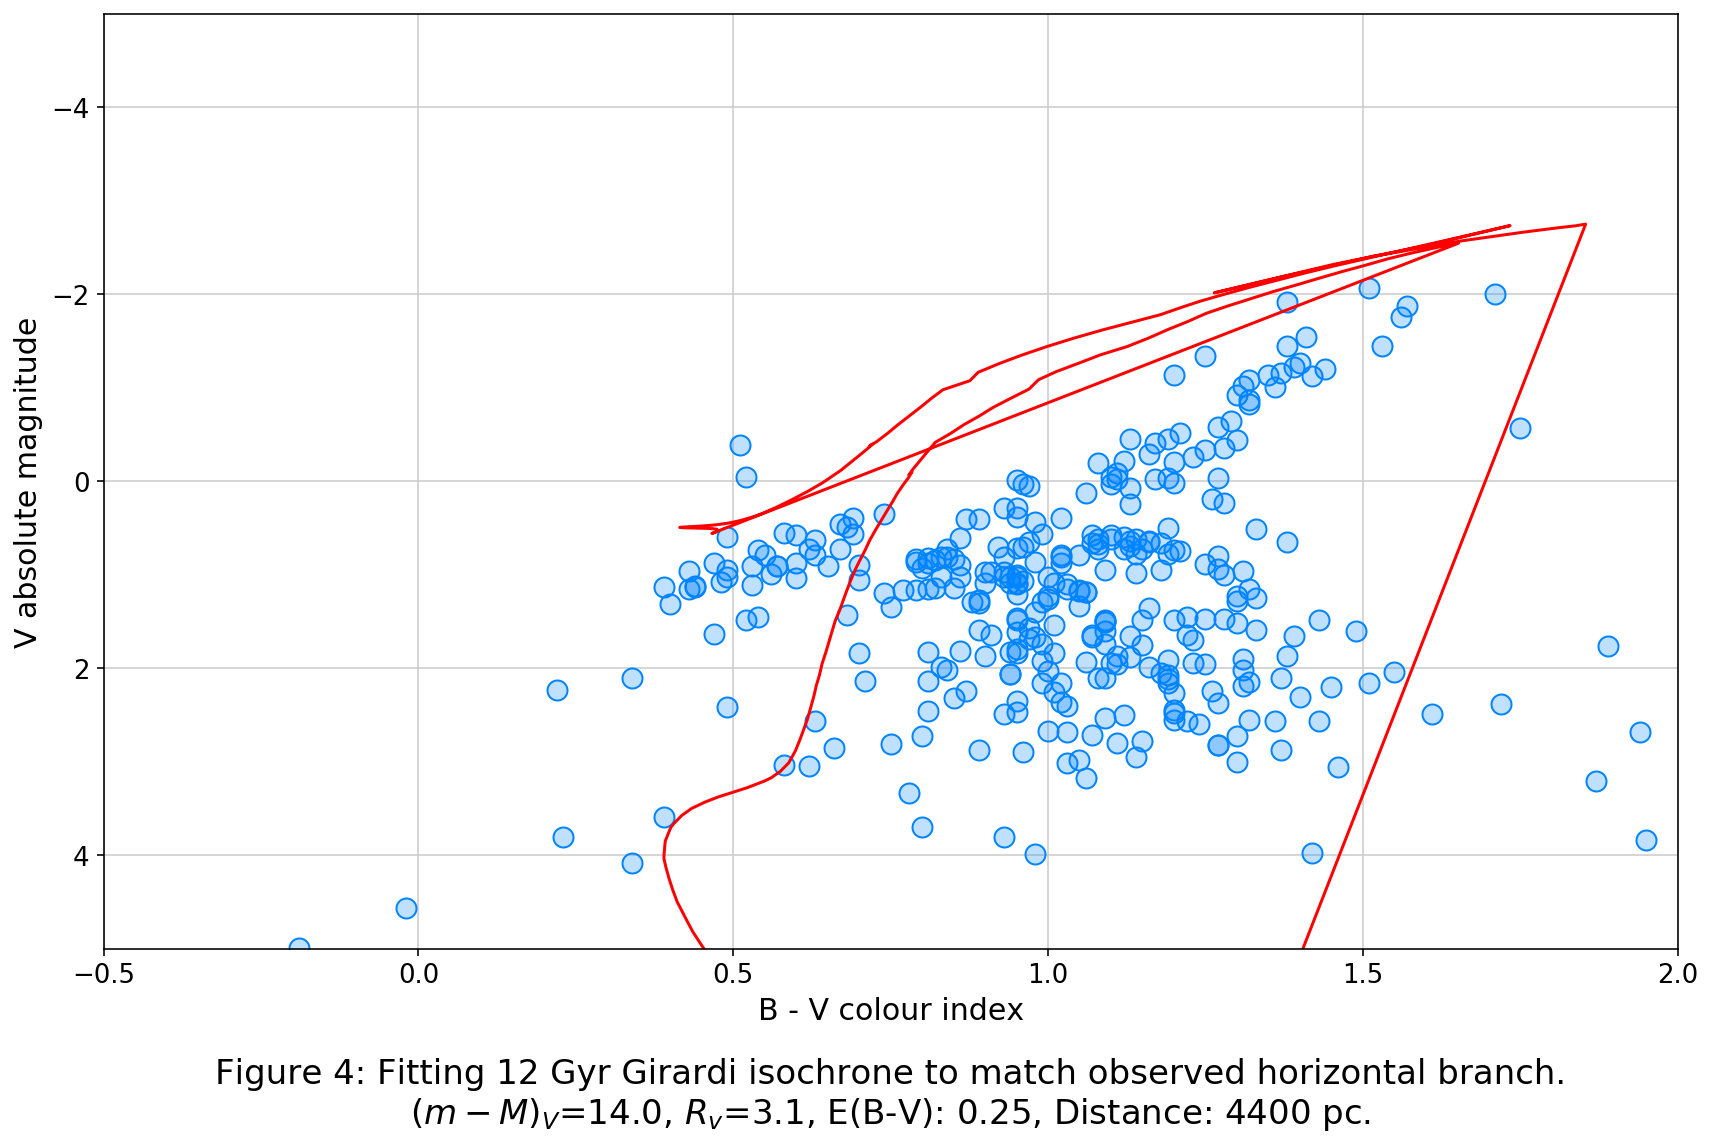

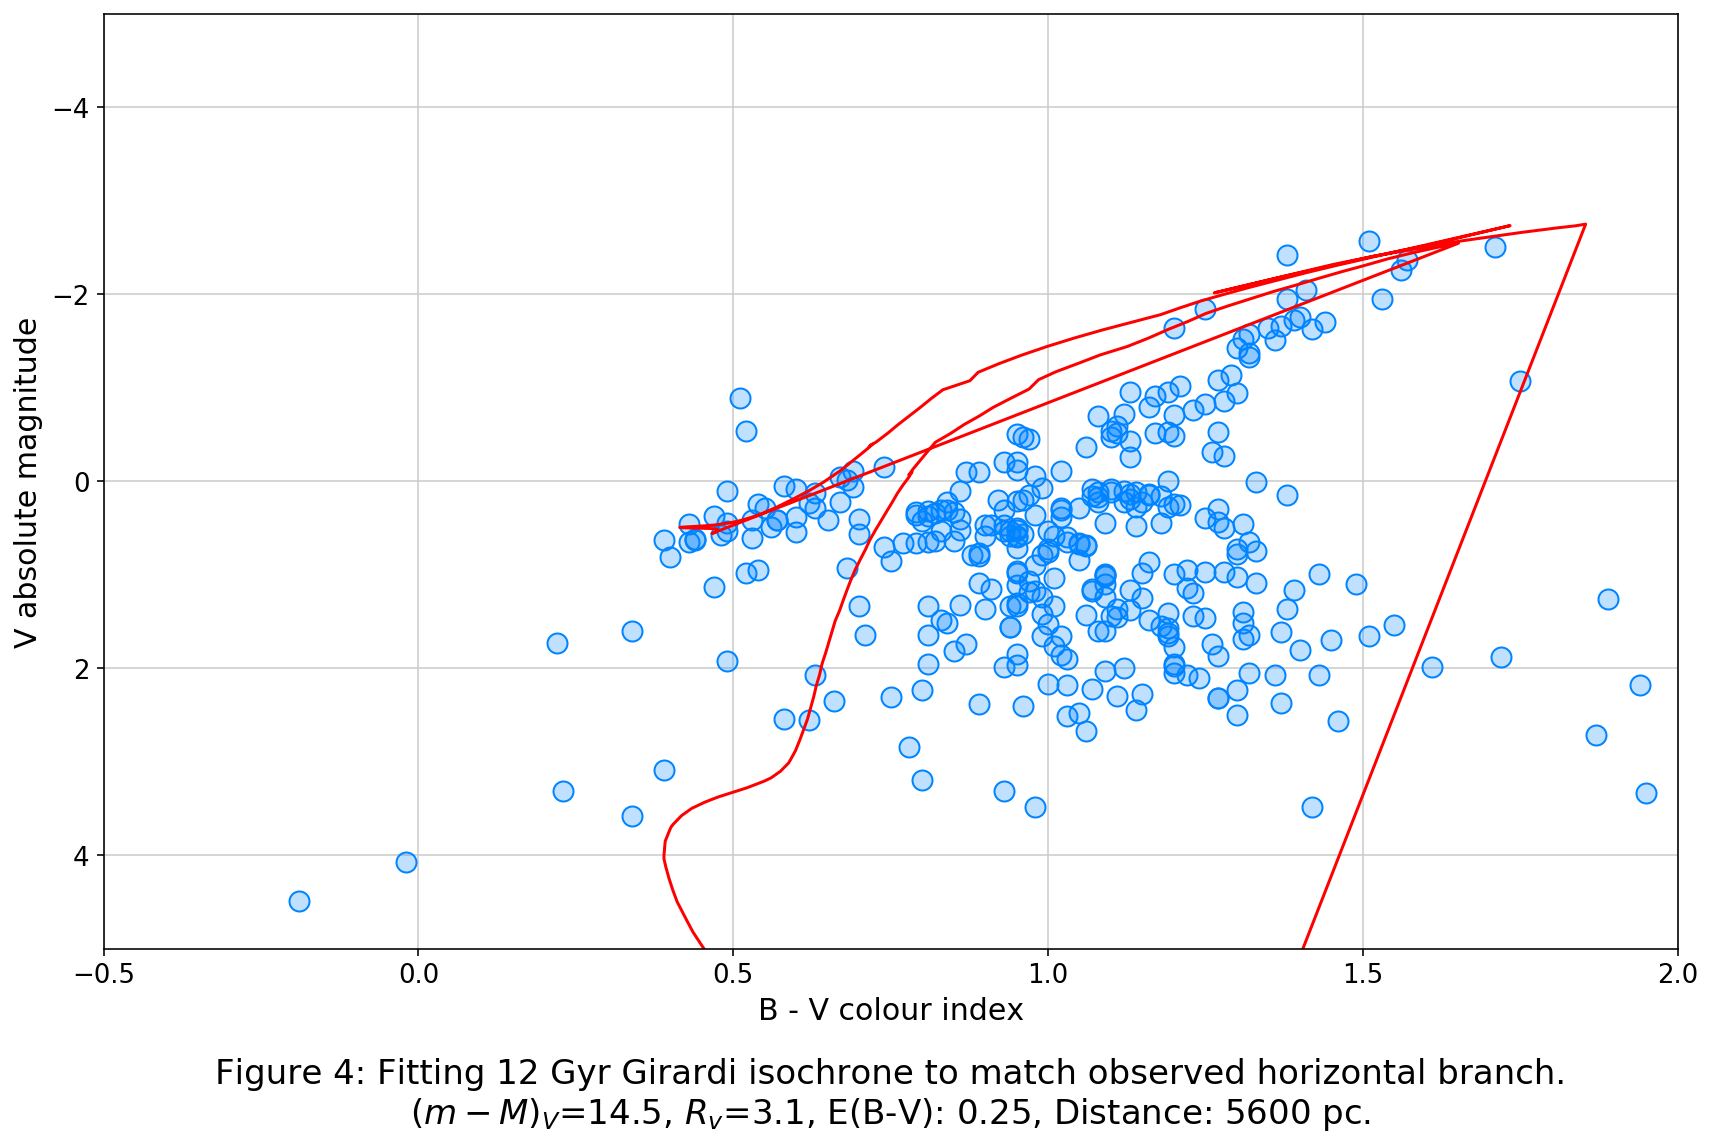

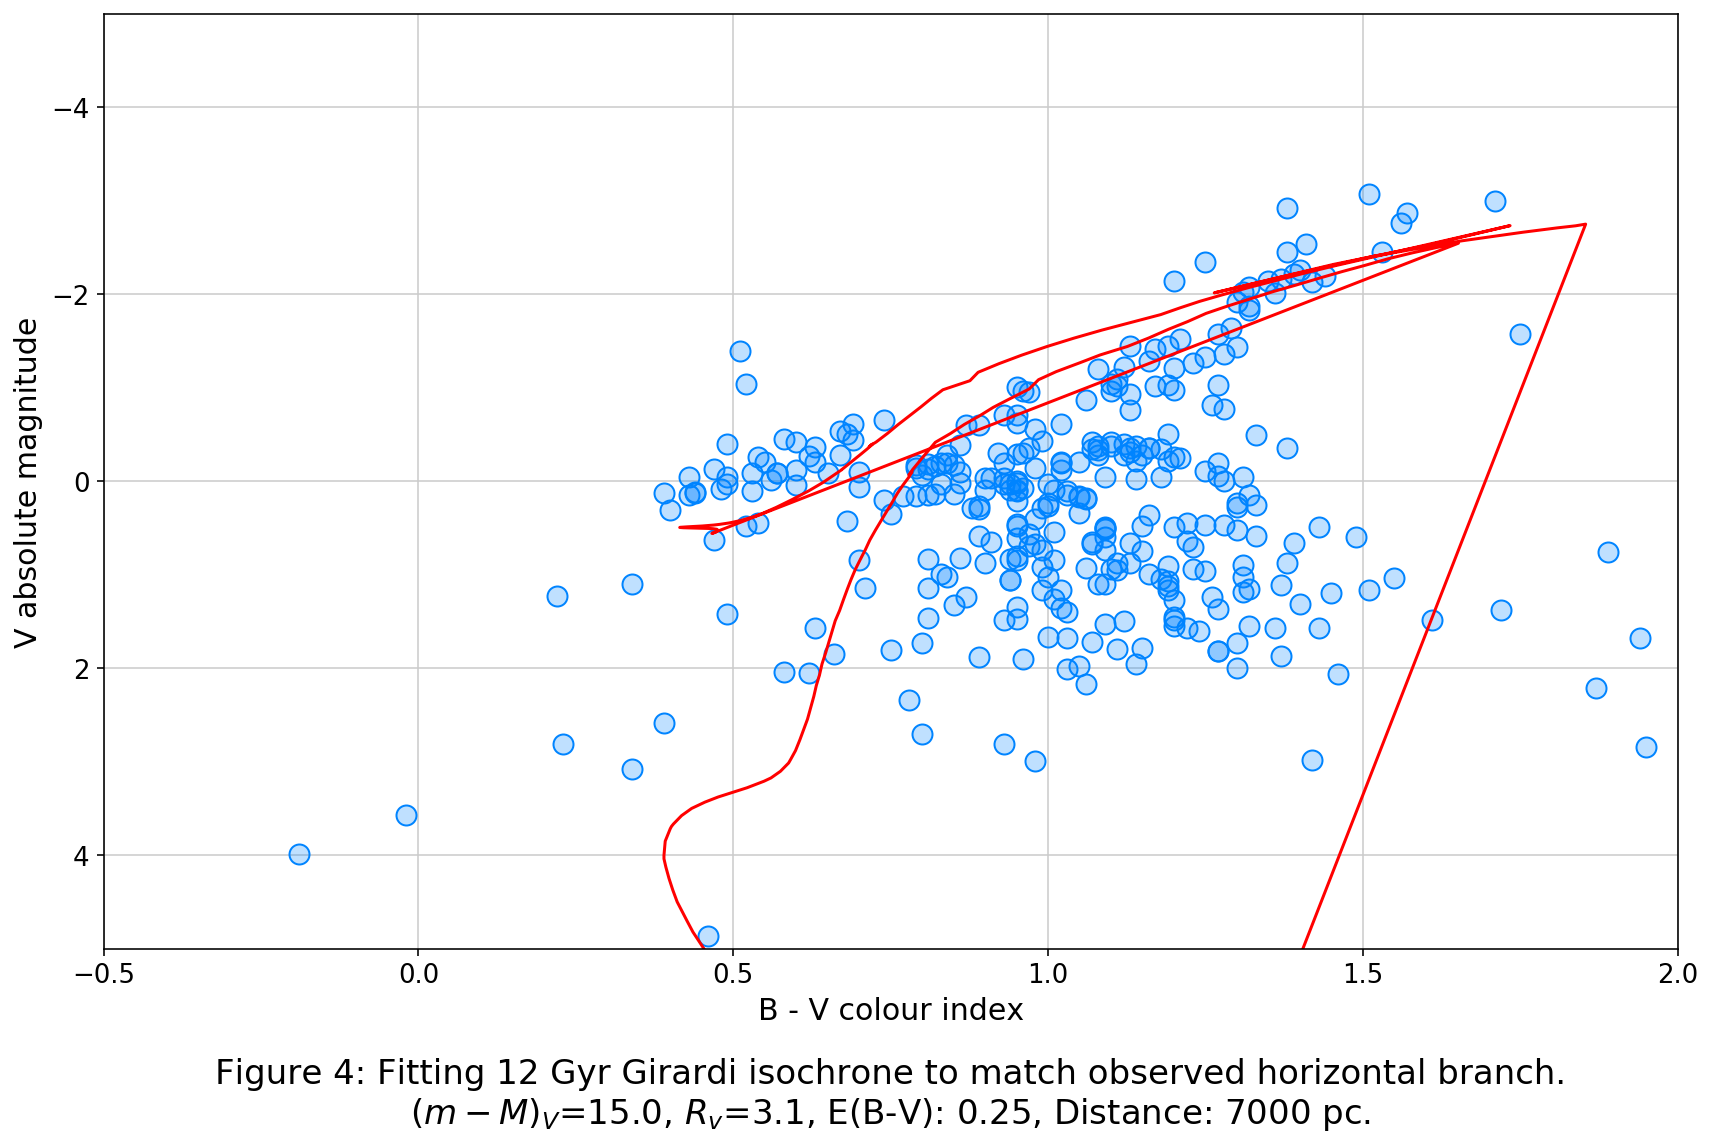

In [24]:
def plot_cmd_with_girardi(plot_dir, file_name, magnitudes_path, xlims, ylims,
                          x_label, y_label, distance_modulus, redenning,
                          girardi_path, title, title_offset):
    """
    Plot color magnitude disgram with observations and Girardi isochrone.
    """    

    fig, ax = make_cmd(data_path=magnitudes_path,
                       blue_mag=f"b_mag",
                       red_mag=f"v_mag",
                       x_label=x_label,
                       y_label=y_label,
                       xlims=xlims, ylims=ylims,
                       title=title,
                       y_offset=-distance_modulus,
                       x_offset=redenning,
                       title_offset=title_offset)
 
    # Read the data from text table,
    # using any whitespace characters as column separators
    df = pd.read_table(girardi_path, delimiter='\s+')

    # Show plot
    ax.plot(df["Bmag"] - df["Vmag"], df["Vmag"], zorder=2, c='red')

    # Expand the plot to the edges
    fig.tight_layout()

    save_plot(fig=fig, file_name=file_name, plot_dir=plot_dir)
    
    
def calculate_distance(apparent_distance_modulus, redenning, r_v = 3.1):
    """
    Calculate distance given apparent distance modulus.
    
    Parameters
    ----------
    
    apparent_distance_modulus: float
        Apparent visual distance modulus
    
    redenning: float
        Redenning, aka E(B - V).
        Extinction correction value of the (B-V) colour.
        
    r_v: float
        Total-to-selective extinction ratio value that is dependent upon the
        density of the interstellar medium. Default value 3.1 form O'Donnell (1994)
        https://ui.adsabs.harvard.edu/abs/1994ApJ...422..158O/abstract
    """

    # Calculate true distance modulus
    true_distance_modulus = apparent_distance_modulus - r_v * redenning

    # Calculate the distance
    return 10 * 10**(true_distance_modulus / 5)


def plot_girardi_and_calculate_distance(distance_modulus, figure_number, redenning):
    r_v=3.1
    distance = calculate_distance(apparent_distance_modulus=distance_modulus,
                                  redenning=redenning, r_v=3.1)
    
    # Round the distance
    distance = round(distance / 100) * 100

    title = (
        f"Figure {figure_number}: Fitting 12 Gyr Girardi isochrone to match observed horizontal branch.\n"
        f"$(m - M)_V$={distance_modulus}, "
        f'$R_v$={r_v:.1f}, '
        f'E(B-V): {redenning:.2f}, '
        f'Distance: {distance:.0f} pc.'
    )
    
    plot_cmd_with_girardi(plot_dir="images", file_name="fit_girardi.png",
                          magnitudes_path=magnitudes_path,
                          xlims=(-0.5, 2), ylims=(-5, 5),
                          x_label="B - V colour index",
                          y_label="V absolute magnitude",
                          distance_modulus=distance_modulus,
                          redenning=redenning,
                          girardi_path="data/girardi/12.00_gyr.txt",
                          title=title,
                          title_offset=-0.2)

    print(f'Distance: {distance:.0f} pc')
    
# Value from Monty et al. 2018, https://arxiv.org/abs/1808.05271
redenning=0.25
    
plot_girardi_and_calculate_distance(distance_modulus=14.0, figure_number=4, redenning=redenning)
plot_girardi_and_calculate_distance(distance_modulus=14.5, figure_number=4, redenning=redenning)
plot_girardi_and_calculate_distance(distance_modulus=15.0, figure_number=4, redenning=redenning)

In [5]:
print("We are done!")

We are done!
